# PCA - Principal Components Analysis 

Ever had to deal with a high-dimensional dataset of 30 columns or more? PCA helps to reduce dimensions while retaining most of the information in the dataset, diminishing the curse of dimensionality and mitigate multicollinearty

## Importing modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

## Load the dataset

In [2]:
dataset = load_breast_cancer()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The breast cancer dataset is a good dataset to illustrate the power of PCA as it has over 30 features.

_Okay, You caught me, or did you? It's also because all features are floating so I can save some work on pre-processing._

## Quick look at the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Awesome! We have total of 30 columns and..... NO NULL! Hooray!

## Multicollinearty

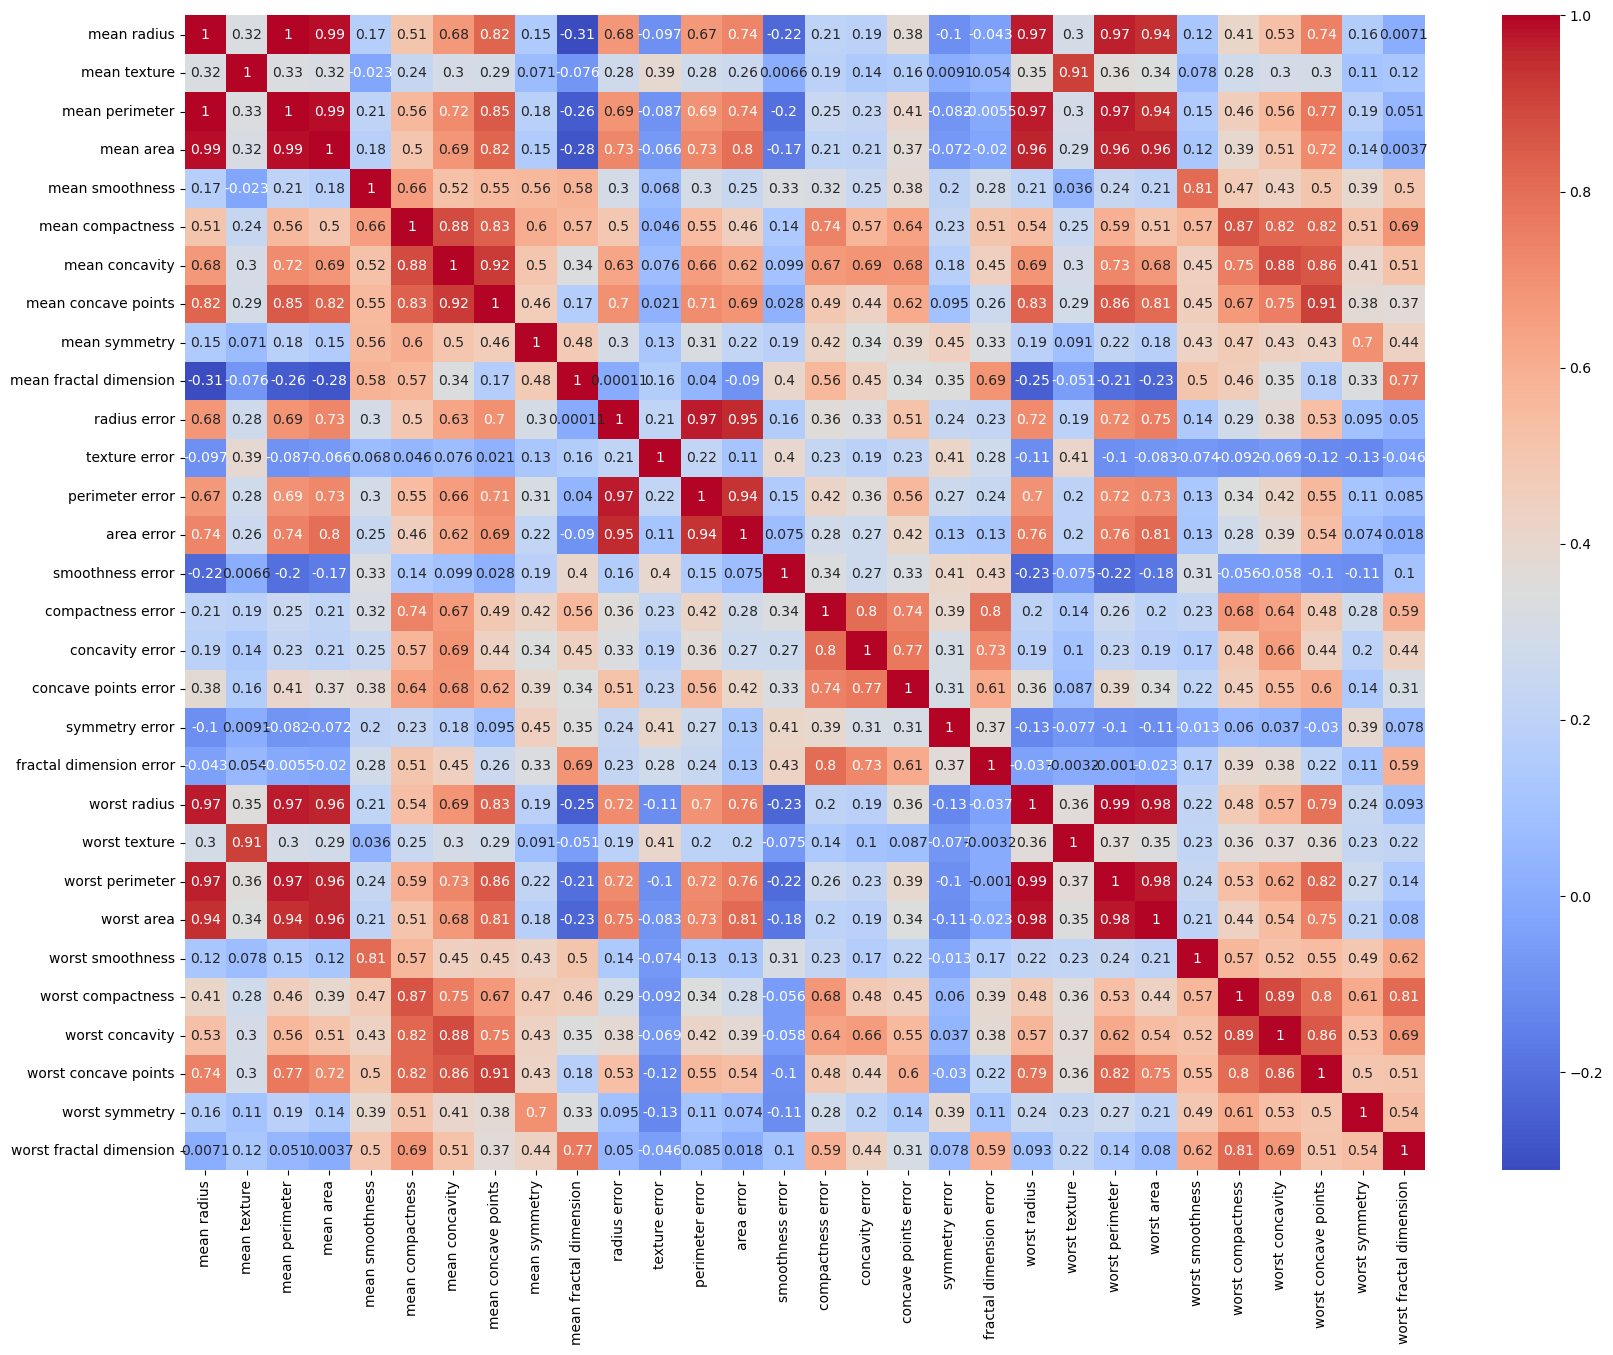

In [4]:
plt.figure(figsize=(20, 15))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

looks like we have quite a bit of multicollinearty concern between the features.

For example : <br>
- `mean radius` and `mean perimeter` look super correlated
- `mean radius` and `mean area` too
- `mean texture` and `worst texture too <br>
and so on and so on...

## Pre-processing
Before we can start start running PCA, we will need to scale to normalize the data first

In [5]:
scaler = StandardScaler()

scaler.fit(df)
transformed_df = pd.DataFrame(scaler.transform(df), columns=df.columns)

transformed_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Time for PCA!

In [6]:
pca = PCA(n_components=10, whiten=True)

pca.fit(transformed_df)
pca_df = pd.DataFrame(pca.transform(transformed_df), columns=[f"PC{i+1}" for i in range(pca.n_components_)])

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.520242,0.816073,-0.668491,2.579693,-0.929932,1.283388,2.625563,-0.576581,-0.243126,-1.480308
1,0.654623,-1.578123,-0.315027,0.793888,0.483812,0.026057,0.016242,0.348762,-1.101607,1.867667
2,1.571964,-0.450286,-0.328392,0.647514,-0.137793,0.492335,-0.812419,0.140921,0.037239,0.766430
3,1.952778,4.303452,-1.924106,0.108298,-2.303901,2.776432,1.738618,1.533419,-2.174788,-1.884510
4,1.078874,-0.815859,0.827167,2.087647,0.425432,-1.115234,-1.138334,0.920973,-0.408215,0.637245


## Components_
reveal how the original features contribute to the variance captured by each principal component. Features with higher absolute values in a particular principal component have a stronger influence on that component. This information helps in interpreting the principal components and understanding the underlying structure of the data.

In [7]:
pd.DataFrame(pca.components_, index=[f"PC{i+1}" for i in range(pca.n_components_)], columns=df.columns)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,0.205979,0.017428,0.211326,0.202870,0.014531,0.170393,0.153590,0.183417,0.042498,0.102568,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,-0.105552,0.089980,-0.089457,-0.152293,0.204430,0.232716,0.197207,0.130322,0.183848,0.280092,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339
PC3,-0.008531,0.064550,-0.009314,0.028700,-0.104292,-0.074092,0.002734,-0.025564,-0.040240,-0.022574,0.268481,0.374634,0.266645,0.216007,0.308839,0.154780,0.176464,0.224658,0.288584,0.211504,-0.047507,-0.042298,-0.048547,-0.011902,-0.259798,-0.236076,-0.173057,-0.170344,-0.271313,-0.232791
PC4,0.041409,-0.603050,0.041983,0.053434,0.159383,0.031795,0.019123,0.065336,0.067125,0.048587,0.097941,-0.359856,0.088992,0.108205,0.044664,-0.027469,0.001317,0.074067,0.044073,0.015305,0.015417,-0.632808,0.013803,0.025895,0.017652,-0.091328,-0.073951,0.006007,-0.036251,-0.077053
PC5,0.037786,-0.049469,0.037375,0.010331,-0.365089,0.011704,0.086375,-0.043861,-0.305941,-0.044424,-0.154456,-0.191651,-0.120990,-0.127574,-0.232066,0.279968,0.353982,0.195548,-0.252869,0.263297,-0.004407,-0.092883,0.007454,-0.027391,-0.324435,0.121804,0.188519,0.043332,-0.244559,0.094423
PC6,0.018741,-0.032179,0.017308,-0.001888,-0.286374,-0.014131,-0.009344,-0.052050,0.356458,-0.119431,-0.025603,-0.028747,0.001811,-0.042864,-0.342917,0.069198,0.056343,-0.031224,0.490246,-0.053195,-0.000291,-0.050008,0.008501,-0.025164,-0.369255,0.047706,0.028379,-0.030873,0.498927,-0.080224
PC7,-0.124088,0.011399,-0.114477,-0.051653,-0.140669,0.030918,-0.107520,-0.150482,-0.093891,0.295760,0.312490,-0.090755,0.314640,0.346679,-0.244024,0.023464,-0.208824,-0.369646,-0.080382,0.191395,-0.009710,0.009871,-0.000446,0.067832,-0.108831,0.140473,-0.060488,-0.167967,-0.018491,0.374658
PC8,-0.007452,0.130675,-0.018687,0.034674,-0.288975,-0.151396,-0.072827,-0.152323,-0.231531,-0.177121,0.022540,-0.475413,-0.011897,0.085805,0.573410,0.117460,0.060566,-0.108319,0.220149,0.011168,0.042619,0.036251,0.030558,0.079394,0.205852,0.084020,0.072468,-0.036171,0.228225,0.048360
PC9,-0.223110,0.112699,-0.223739,-0.195586,0.006425,-0.167841,0.040591,-0.111971,0.256040,-0.123741,0.249985,-0.246645,0.227154,0.229160,-0.141925,-0.145323,0.358107,0.272520,-0.304077,-0.213723,-0.112142,0.103341,-0.109614,-0.080732,0.112316,-0.100678,0.161909,0.060489,0.064638,-0.134174
PC10,0.095486,0.240934,0.086386,0.074957,-0.069293,0.012938,-0.135602,0.008053,0.572069,0.081103,-0.049549,-0.289143,-0.114508,-0.091927,0.160885,0.043503,-0.141277,0.086241,-0.316530,0.367544,0.077361,0.029551,0.050508,0.069921,-0.128305,-0.172133,-0.311637,-0.076648,-0.029563,0.012608


For example : <br><br>
Features like `mean radius` , `mean perimeter` and `mean area` have relatively high positive loadings, indicating that they contribute significantly to PC1. On the other hand, in PC2, `mean radius` , `mean perimeter` and `mean area` have negative loadings, while features like `mean texture` and `mean concave points` have relatively high positive loadings.

Understanding these loadings can provide insights into which features are important for explaining the variation in the data captured by each principal component, aiding in data interpretation and feature selection.

## explained variance ratio
represents the proportion of variance explained by each principal component. It helps in understanding the relative importance of each principal component in capturing the variability present in the original data.

In [8]:
pd.DataFrame(pca.explained_variance_ratio_, index=[f"PC{i+1}" for i in range(pca.n_components_)], columns=['explained_variance_ratio'])

,explained_variance_ratio
PC1,0.442720
PC2,0.189712
PC3,0.093932
PC4,0.066021
PC5,0.054958
PC6,0.040245
PC7,0.022507
PC8,0.015887
PC9,0.013896
PC10,0.011690


PC1 explains approximately 44.27% of the total variance in the data. <br>
PC2 explains approximately 18.97% of the total variance.<br>
PC3 explains approximately 9.39% of the total variance.<br>
and so on...

In [9]:
pca.explained_variance_ratio_.sum()

0.9515688143335534

~95.16% of the total variance in the original data is explained by the 10 principal components retained after PCA. 

This value provides insight into how much information is preserved after dimensionality reduction through PCA. In this case, with a cumulative explained variance ratio of 0.9515, it suggests that a significant portion of the original data's variability is retained in the reduced-dimensional space represented by the retained principal components.

## Do we still have any multicollinearty concern?

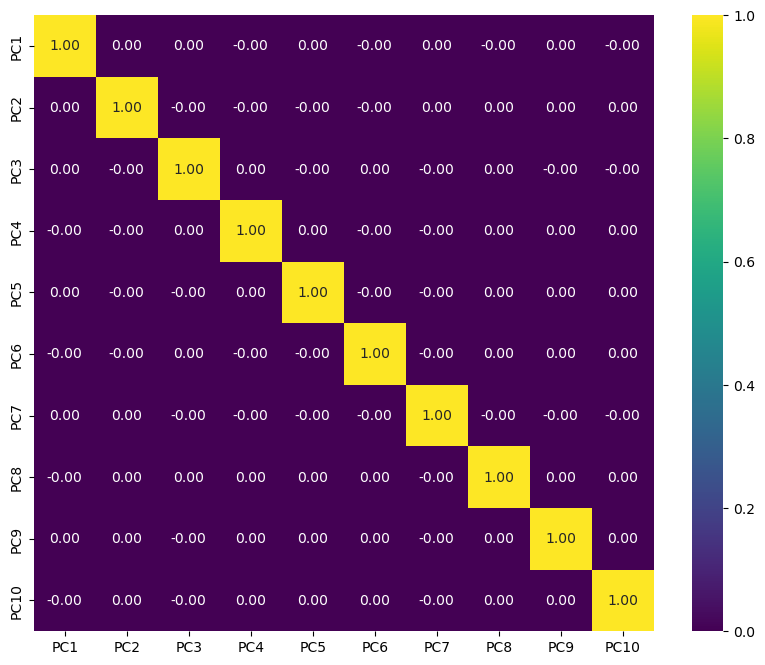

In [10]:
plt.figure(figsize=(10, 8))

sns.heatmap(pca_df.corr(), annot=True, cmap='viridis', fmt=".2f")

plt.show()

Grand! Looks like all PCs are independence from one another and effectiveness in capturing distinct pattern in data. 

With this, I've completed PCA and reduced a 30 features dataset to 10 PC features. This reduced dataset can now be fitted faster to a ML algo.